In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [7]:
confirmed_cases = pd.read_csv('C:/Users/Bao Han/PycharmProject/covid19/data20200606/time_series_covid19_confirmed.csv')
deaths_reported = pd.read_csv('C:/Users/Bao Han/PycharmProject/covid19/data20200606/time_series_covid19_deaths.csv')
recovered_cases = pd.read_csv('C:/Users/Bao Han/PycharmProject/covid19/data20200606/time_series_covid19_recovered.csv')


In [8]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,998,1004,1029,1050,1076,1099,1122,1137,1143,1164
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,763,763,763,763,764,764,764,765,844
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,69,70,70,71,74,81,84,86,86,86


In [9]:
deaths_reported.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,218,219,220,227,235,246,249,257,265,270
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,32,32,33,33,33,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,600,609,617,623,630,638,646,653,661,667
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [10]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,789,795,803,812,823,851,857,872,877,891
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,653,663,676,676,681,684,692,694,698,733
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18


In [11]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/24/20', '5/25/20', '5/26/20', '5/27/20', '5/28/20', '5/29/20',
       '5/30/20', '5/31/20', '6/1/20', '6/2/20'],
      dtype='object', length=137)

In [12]:
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:,cols[4]:cols[-1]]

In [13]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20
0,0,0,0,0,0,0,0,0,0,0,...,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509
1,0,0,0,0,0,0,0,0,0,0,...,998,1004,1029,1050,1076,1099,1122,1137,1143,1164
2,0,0,0,0,0,0,0,0,0,0,...,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626
3,0,0,0,0,0,0,0,0,0,0,...,762,763,763,763,763,764,764,764,765,844
4,0,0,0,0,0,0,0,0,0,0,...,69,70,70,71,74,81,84,86,86,86


In [ ]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [15]:
confirmed_sum

6378237

In [16]:
death_sum

380249

In [17]:
recovered_sum

2729527

In [18]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97888,
 101806,
 105848,
 109822,
 113595,
 118623,
 125879,
 131007,
 145225,
 156120,
 167507,
 181653,
 197150,
 214873,
 242632,
 272264,
 304580,
 337022,
 378301,
 418295,
 467817,
 529722,
 593764,
 661174,
 720291,
 782816,
 857608,
 933010,
 1013863,
 1096324,
 1176436,
 1249743,
 1321436,
 1396438,
 1480232,
 1566102,
 1658261,
 1736412,
 1835145,
 1905165,
 1975566,
 2055748,
 2152181,
 2239990,
 2317636,
 2400787,
 2472109,
 2549046,
 2624608,
 2708403,
 2795731,
 2881140,
 2955033,
 3023722,
 3097229,
 3172287,
 3256910,
 3345558,
 3427584,
 3506729,
 3583055,
 3662691,
 3756069,
 3845718,
 3938064,
 4024009,
 4101699,
 4177502,
 4261747,
 4347018

In [19]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [20]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [21]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79561],
       [  80406],
       [  81388],
       [  82746],
       [  84112],
       [  86011],
       [  88369],
       [  90306],
       [  92840],
       [  95120],
       [  97888],
       [ 101806],
       [ 105848],
       [ 109822],
       [ 113595],
       [ 118623],
       [ 125879],
       [ 131007],
       [ 145225],
       [ 156120],
       [ 167507],
       [ 181653],
       [ 1

In [22]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3347],
       [  3459],
       [  3558],
       [  3801],
       [  3987],
       [  4263],
       [  4614],
       [  4912],
       [  5409],
       [  5832],
       [  6473],
       [  7151],
       [  7957],
       [  8824],
       [  9947],
       [ 11423

In [23]:
total_recovered

array([[     28],
       [     30],
       [     36],
       [     39],
       [     52],
       [     61],
       [    107],
       [    126],
       [    143],
       [    222],
       [    284],
       [    472],
       [    623],
       [    852],
       [   1124],
       [   1487],
       [   2011],
       [   2616],
       [   3244],
       [   3946],
       [   4683],
       [   5150],
       [   6295],
       [   8058],
       [   9395],
       [  10865],
       [  12583],
       [  14352],
       [  16121],
       [  18177],
       [  18890],
       [  22886],
       [  23394],
       [  25227],
       [  27905],
       [  30384],
       [  33277],
       [  36711],
       [  39782],
       [  42716],
       [  45602],
       [  48228],
       [  51170],
       [  53796],
       [  55865],
       [  58358],
       [  60694],
       [  62494],
       [  64404],
       [  67003],
       [  68324],
       [  70251],
       [  72622],
       [  76032],
       [  78086],
       [  

In [24]:
# prediction for the next 10 days
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [30]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [31]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days = i)).strftime('$m/$d/%Y'))

In [32]:
start_date

datetime.datetime(2020, 1, 22, 0, 0)

In [33]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [37]:
latest_confirmed

0      16509
1       1164
2       9626
3        844
4         86
       ...  
261      484
262      399
263      132
264     4100
265        2
Name: 6/2/20, Length: 266, dtype: int64

In [34]:
latest_deaths

0      270
1       33
2      667
3       51
4        4
      ... 
261     12
262     87
263      2
264     47
265      0
Name: 6/2/20, Length: 266, dtype: int64

In [35]:
latest_recoveries

0      1450
1       891
2      6067
3       733
4        18
       ... 
248      68
249      15
250      27
251    2217
252       1
Name: 6/2/20, Length: 253, dtype: int64

In [38]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [43]:
##improvement needed
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)
    


In [77]:
unique_countries = [k for k, v in sorted(zip(unique_countries,country_confirmed_cases),key = operator.itemgetter(1),reverse = True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

country_confirmed_cases

[1831821,
 555383,
 423186,
 279392,
 239932,
 233515,
 207191,
 188450,
 183879,
 170039,
 165555,
 157562,
 108686,
 97326,
 93959,
 89011,
 84161,
 76398,
 60259,
 58615,
 52445,
 46852,
 44255,
 40414,
 38589,
 35836,
 35812,
 35788,
 32895,
 30874,
 30593,
 28649,
 27549,
 27536,
 25066,
 24895,
 24395,
 19517,
 18997,
 18319,
 17752,
 17285,
 16837,
 16759,
 16509,
 14095,
 12799,
 12311,
 11934,
 11590,
 11571,
 11454,
 10991,
 10819,
 10009,
 9626,
 9364,
 8548,
 8455,
 8297,
 7877,
 7866,
 7387,
 7229,
 6887,
 6585,
 5935,
 5586,
 5527,
 5310,
 4100,
 4020,
 3921,
 3886,
 3836,
 3779,
 3760,
 3326,
 3083,
 3024,
 2937,
 2803,
 2653,
 2538,
 2535,
 2391,
 2246,
 2226,
 2099,
 2093,
 2092,
 2089,
 1870,
 1845,
 1841,
 1819,
 1806,
 1683,
 1682,
 1522,
 1504,
 1475,
 1351,
 1344,
 1339,
 1306,
 1242,
 1164,
 1118,
 1105,
 1089,
 1086,
 1071,
 1069,
 1064,
 1013,
 994,
 960,
 952,
 896,
 881,
 845,
 844,
 826,
 803,
 796,
 755,
 712,
 672,
 668,
 620,
 611,
 590,
 509,
 489,
 484,

In [78]:
#number of cases per country/region

print('confirmed Cases by countries/Region:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]} cases')

confirmed Cases by countries/Region:
US:1831821 cases
Brazil:555383 cases
Russia:423186 cases
United Kingdom:279392 cases
Spain:239932 cases
Italy:233515 cases
India:207191 cases
France:188450 cases
Germany:183879 cases
Peru:170039 cases
Turkey:165555 cases
Iran:157562 cases
Chile:108686 cases
Mexico:97326 cases
Canada:93959 cases
Saudi Arabia:89011 cases
China:84161 cases
Pakistan:76398 cases
Qatar:60259 cases
Belgium:58615 cases
Bangladesh:52445 cases
Netherlands:46852 cases
Belarus:44255 cases
Ecuador:40414 cases
Sweden:38589 cases
Singapore:35836 cases
South Africa:35812 cases
United Arab Emirates:35788 cases
Portugal:32895 cases
Switzerland:30874 cases
Colombia:30593 cases
Kuwait:28649 cases
Indonesia:27549 cases
Egypt:27536 cases
Ireland:25066 cases
Ukraine:24895 cases
Poland:24395 cases
Romania:19517 cases
Philippines:18997 cases
Argentina:18319 cases
Dominican Republic:17752 cases
Israel:17285 cases
Japan:16837 cases
Austria:16759 cases
Afghanistan:16509 cases
Panama:14095 case

In [81]:
#find the list of unqiue provinces
unique_provinces = list(confirmed_cases['Province/State'].unique())
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)
    
#number of cases per province/state/city

for i in range(len(unique_provinces)):
     print(f'{unique_provinces[i]}:{province_confirmed_cases[i]} cases')

Australian Capital Territory:107 cases
New South Wales:3104 cases
Northern Territory:29 cases
Queensland:1059 cases
South Australia:440 cases
Tasmania:228 cases
Victoria:1670 cases
Western Australia:592 cases
Alberta:7057 cases
British Columbia:2601 cases
Grand Princess:13 cases
Manitoba:297 cases
New Brunswick:133 cases
Newfoundland and Labrador:261 cases
Nova Scotia:1057 cases
Ontario:30259 cases
Prince Edward Island:27 cases
Quebec:51593 cases
Saskatchewan:646 cases
Anhui:991 cases
Beijing:593 cases
Chongqing:579 cases
Fujian:358 cases
Gansu:139 cases
Guangdong:1597 cases
Guangxi:254 cases
Guizhou:147 cases
Hainan:169 cases
Hebei:328 cases
Heilongjiang:945 cases
Henan:1276 cases
Hong Kong:1093 cases
Hubei:68135 cases
Hunan:1019 cases
Inner Mongolia:235 cases
Jiangsu:653 cases
Jiangxi:937 cases
Jilin:155 cases
Liaoning:149 cases
Macau:45 cases
Ningxia:75 cases
Qinghai:18 cases
Shaanxi:309 cases
Shandong:792 cases
Shanghai:673 cases
Shanxi:198 cases
Sichuan:577 cases
Tianjin:192 cases

In [86]:
#handling nan values if there is any
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    provinces_confirmed_cases.pop(i)

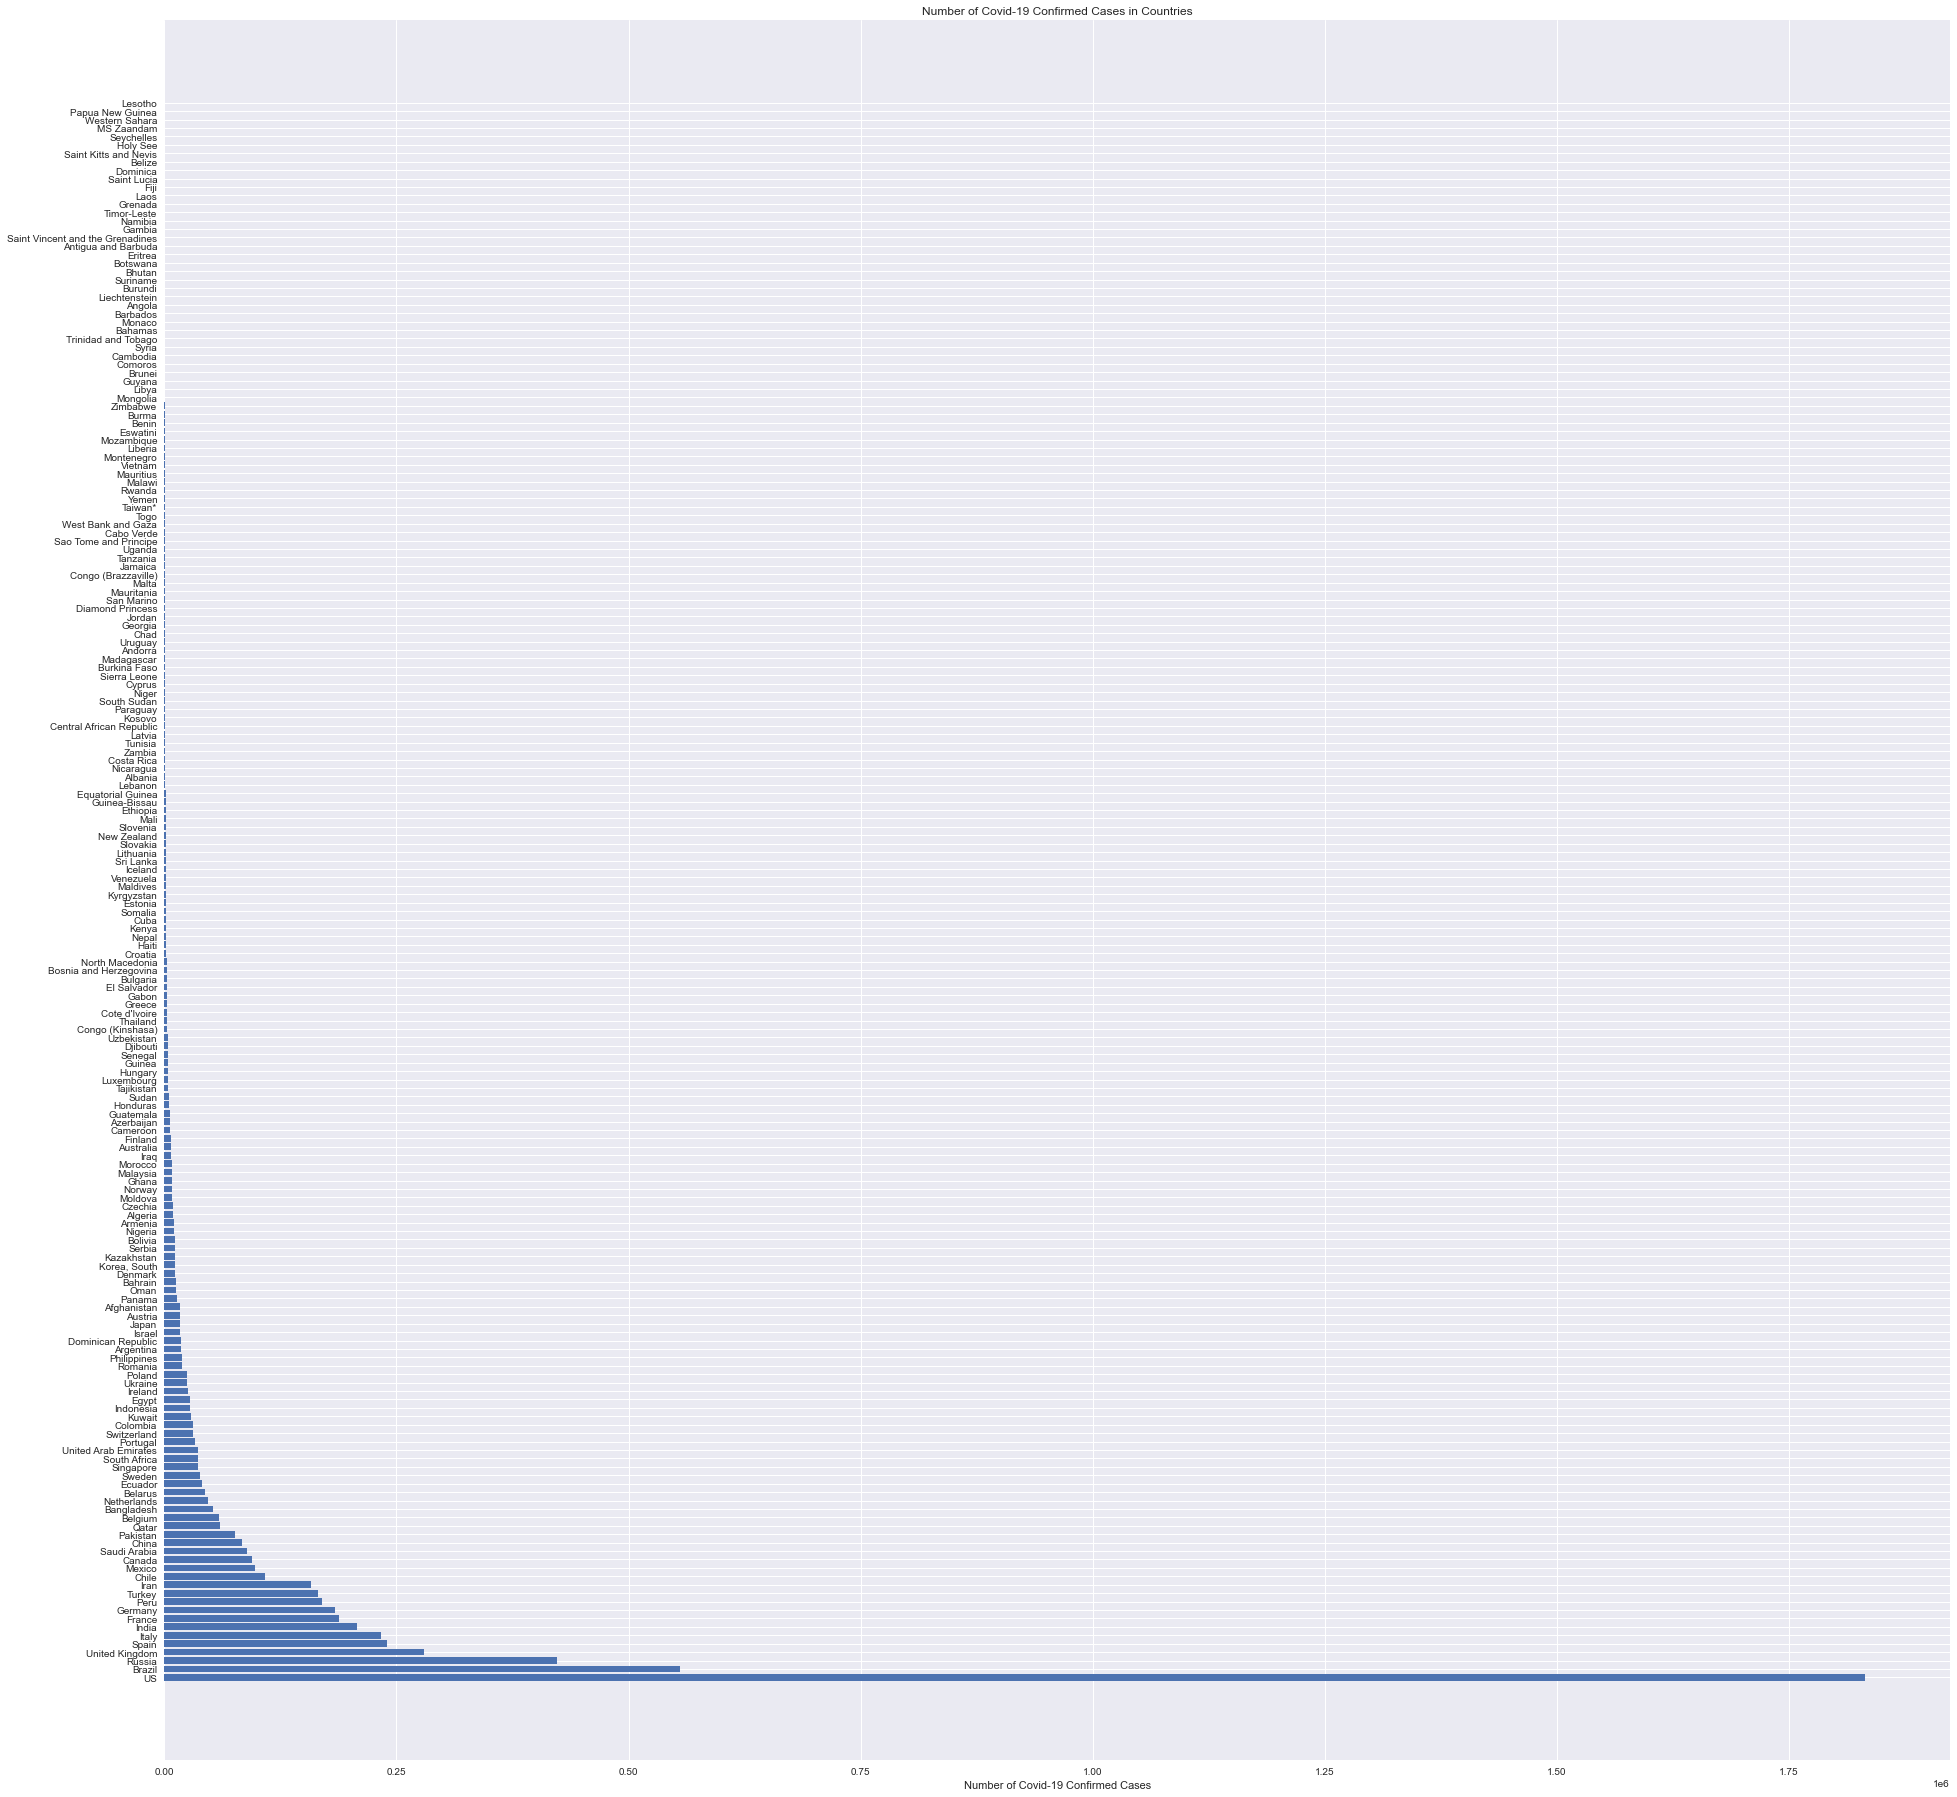

In [90]:
#plot a bar graph 

plt.figure(figsize = (32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid-19 Confirmed Cases')
plt.show()

In [93]:
#only showing 10 countries with most confirmed cases, the rest are grouped into "others" category

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

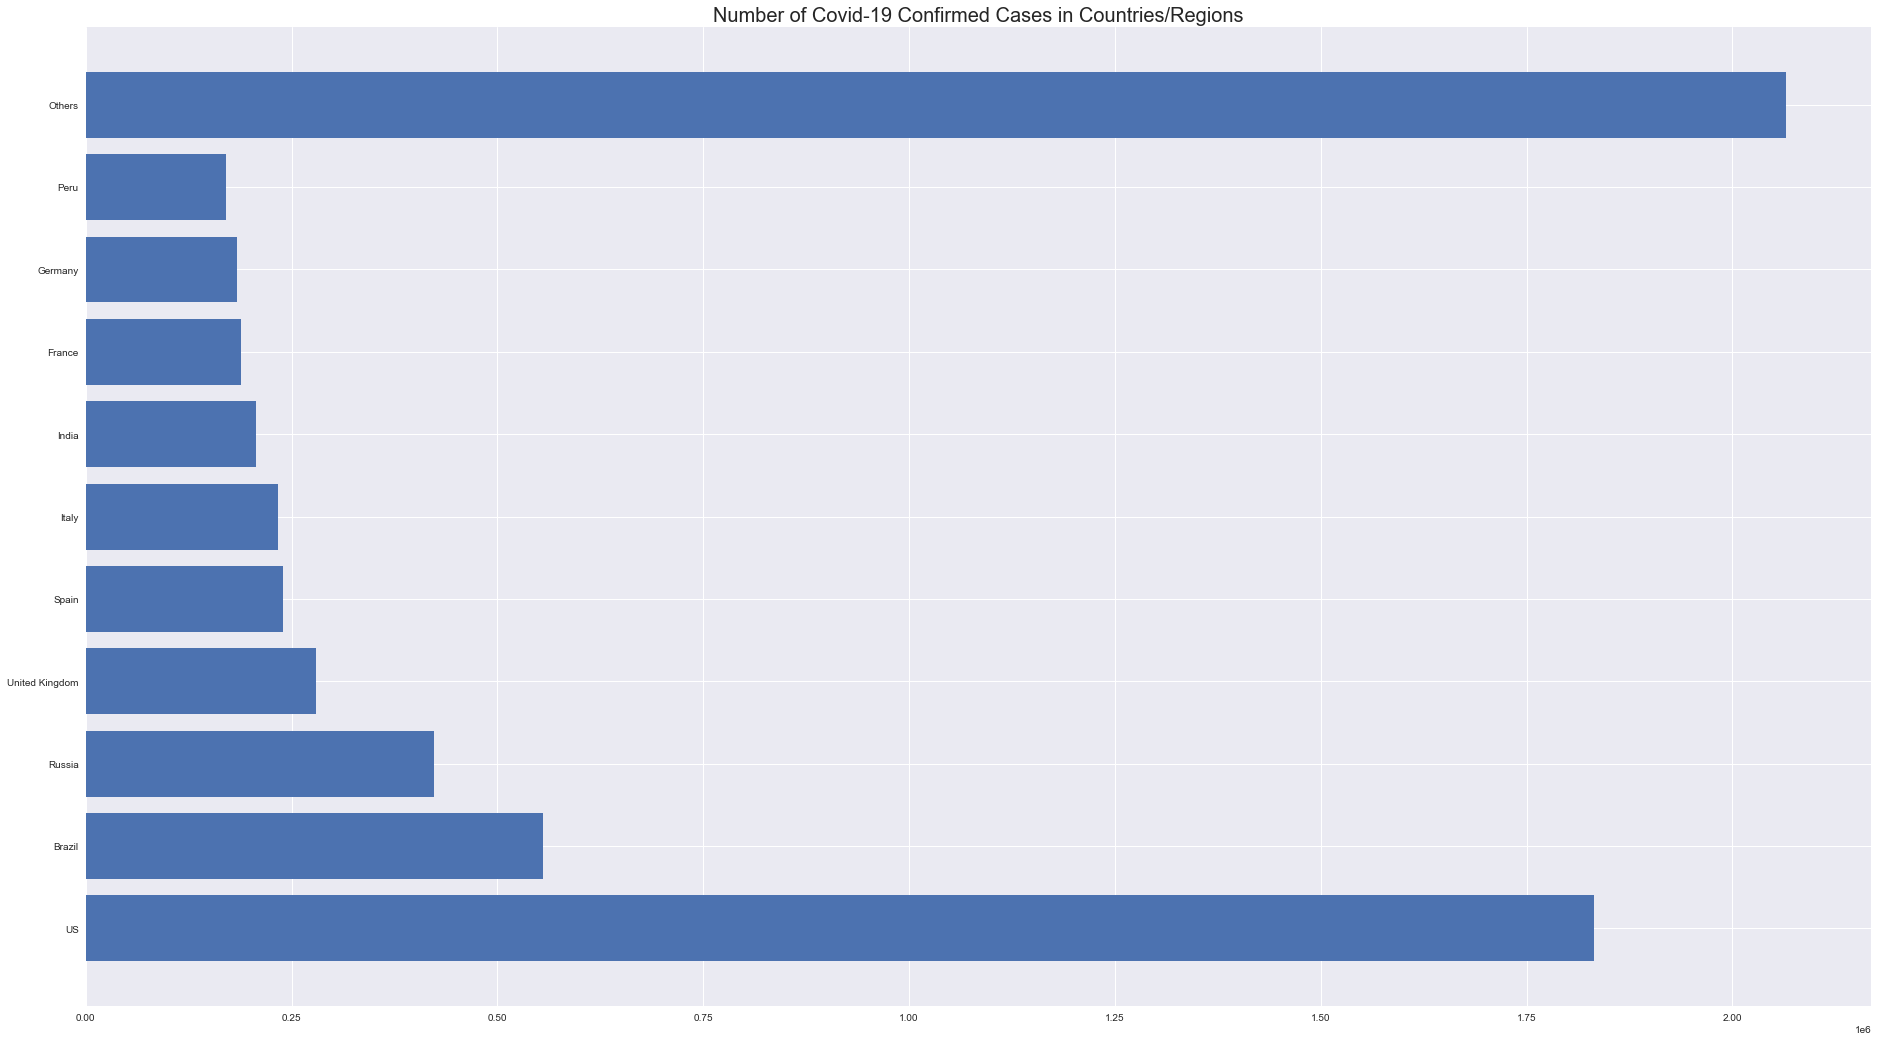

In [95]:
plt.figure(figsize = (32,18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size = 20)
plt.show()

In [98]:
#building the SVM model

kernel = ['poly','sigmoid', 'rbf']
c = [0.01,0.1,1,10]
gamma = [0.01,0.1,1]
epsilon = [0.01, 0.1,1]
shrinking = [True, False]
svm_grid = {'kernel':kernel,'C':c,'gamma':gamma, 'epsilon':epsilon,'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm,svm_grid,scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1,n_iter = 40, verbose = 1)
X_train_confirmed, X_test_confirmed,y_train_confirmed,y_test_confirmed = train_test_split(days_since_1_22,world_cases,test_size=0.15,shuffle = False)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   46.1s finished
c:\users\bao han\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [100]:
svm_search.best_params_

{'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'poly', 'shrinking': True}

In [102]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [103]:
svm_confirmed

SVR(C=10, epsilon=0.01, gamma=0.1, kernel='poly')

In [104]:
svm_pred

array([-1.14798956e+04, -1.14766249e+04, -1.14537300e+04, -1.13915867e+04,
       -1.12705708e+04, -1.10710581e+04, -1.07734244e+04, -1.03580454e+04,
       -9.80529710e+03, -9.09555516e+03, -8.20919540e+03, -7.12659363e+03,
       -5.82812565e+03, -4.29416725e+03, -2.50509424e+03, -4.41282406e+02,
        1.91689244e+03,  4.58905452e+03,  7.59482801e+03,  1.09538371e+04,
        1.46857061e+04,  1.88100590e+04,  2.33465202e+04,  2.83147138e+04,
        3.37342641e+04,  3.96247951e+04,  4.60059313e+04,  5.28972966e+04,
        6.03185154e+04,  6.82892118e+04,  7.68290100e+04,  8.59575343e+04,
        9.56944088e+04,  1.06059258e+05,  1.17071705e+05,  1.28751376e+05,
        1.41117893e+05,  1.54190882e+05,  1.67989966e+05,  1.82534770e+05,
        1.97844918e+05,  2.13940033e+05,  2.30839741e+05,  2.48563666e+05,
        2.67131431e+05,  2.86562661e+05,  3.06876980e+05,  3.28094012e+05,
        3.50233382e+05,  3.73314713e+05,  3.97357630e+05,  4.22381758e+05,
        4.48406719e+05,  

MAE: 668573.0799160637
MSE: 516413475938.62274


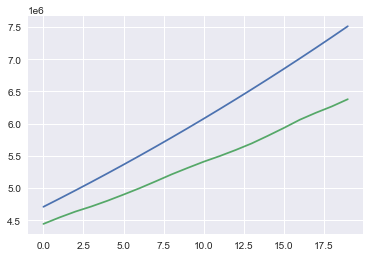

In [105]:
#checking against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred,y_test_confirmed))

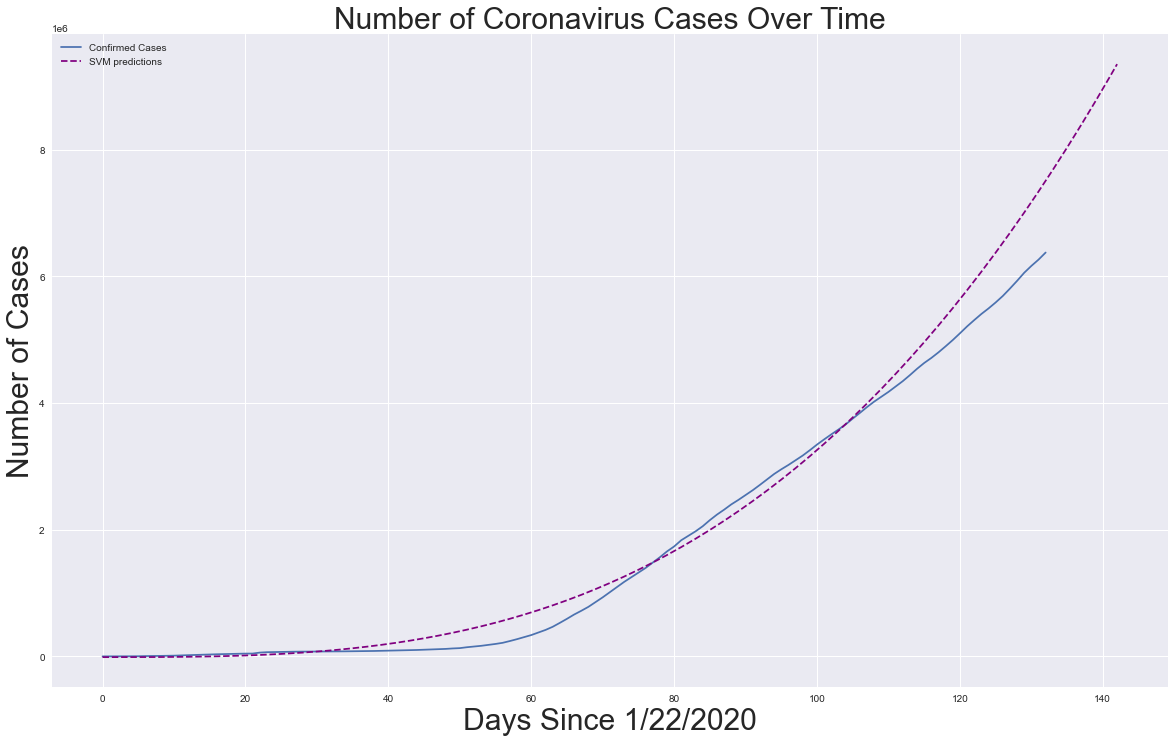

In [106]:
#Total number of coronavirus cases over time vs prediction

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,world_cases)
plt.plot(future_forecast,svm_pred,linestyle = 'dashed', color = 'purple')
plt.title('Number of Coronavirus Cases Over Time', size = 30)
plt.xlabel('Days Since 1/22/2020',size = 30)
plt.ylabel('Number of Cases', size = 30)
plt.legend(['Confirmed Cases','SVM predictions'])


In [ ]:
#prediction for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:],svm_pred[-10:]))

SVM future predictions:


{('$m/$d/2020', 7683290.431077067),
 ('$m/$d/2020', 7858164.959122721),
 ('$m/$d/2020', 8035669.130147044),
 ('$m/$d/2020', 8215822.568364207),
 ('$m/$d/2020', 8398644.897900645),
 ('$m/$d/2020', 8584155.742955271),
 ('$m/$d/2020', 8772374.727932993),
 ('$m/$d/2020', 8963321.476826731),
 ('$m/$d/2020', 9157015.61380488),
 ('$m/$d/2020', 9353476.763363902)}